<a href="https://colab.research.google.com/github/vn322/Sport-University/blob/main/Dota_2_Competitive_Picks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dota 2 Competitive Picks

All Hero Picks in the pro scene (Patch 7.33e)

https://www.kaggle.com/datasets/nihalbarua/dota2-competitive-picks/



Also see its sister dataset for public matches.
I wanted to create a dataset for the most used heroes in ESL Dreamleague season 20 (2023-06), and came across the OpenDota API which helped me create this dataset. https://liquipedia.net/dota2/DreamLeague/Season_20
The data is given as follows :-

•	Name : Name of the hero

•	Primary Attribute : str stands for Strength, agi stands for Agility, int stands for Intelligence, and all stands for Universal. (Universal heroes don't have a Primary Attribute, but get 0.7 damage per point of each attribute)

•	Attack Type : Heroes have either Melee or Ranged Attack type.

•	Attack Range : Almost all Melee heroes have a base attack range of 150, with some outliers. Some items (ie. Broom Handle, Dragon Lance) also exist which increase attack range, but we are not considering those here.

•	Roles : Each hero fulfils a specific role in their team. Normally, a team has 3 Cores(Carry) and 2 Supports. There are also subroles such as Disabler, Pusher, Durable, Initiator, Nuker or Escape which further dictate the playstyle that can be expected from the hero. A good balance of subroles leads to a balanced draft.

•	Total Pro Wins : Number of times the hero was successfully drafted and is part of winning team

•	Times Picked : Number of times the hero was successfully drafted into either team

•	Times Banned : Number of times hero was banned from draft

•	Win Rate : Percentage of games won on successful draft

•	Niche Hero : A hero qualifies as "niche" when it has a low ban rate, low pick rate and a low to moderate (45%-55%) win rate.

o	Heroes can be niche for a variety of reasons; they can be used to counter other picks, player mastery, team composition, pocket strategies, or may not be in the current meta


набор данных для наиболее часто используемых героев 20-го сезона ESL Dreamleague  на API OpenDota

Данные представлены следующим образом: -

•	Name : Имя героя

•	Primary Attribute : str означает силу, agi означает ловкость, int означает интеллект и all означает универсальность. (У универсальных героев нет основного Атрибута, но они получают 0,7 урона за очко каждого атрибута)

•	Attack Type : Герои имеют тип атаки ближнего или дальнего боя.

•	Attack Range : Почти все герои ближнего боя имеют базовую дальность атаки 150, с некоторыми отклонениями. Также существуют некоторые предметы (например, ручка метлы, копье дракона), которые увеличивают дальность атаки, но мы не рассматриваем их здесь.

•	Roles : Каждый герой выполняет определенную роль в своей команде. Обычно в команде есть 3 ядра (керри) и 2 поддержки. Существуют также дополнительные роли, такие как Disabler, Pusher, Durable, Initiator, Nuker или Escape, которые дополнительно определяют стиль игры, которого можно ожидать от героя. Хороший баланс подролей приводит к сбалансированному драфту.

•	Total Pro Wins : сколько раз герой был успешно выбран и стал частью команды-победителя.

•	Times Picked : количество раз, когда герой был успешно выбран в любую команду.

•	Times Banned : сколько раз героя забанили на драфте.

•	Win Rate : процент игр, выигранных при успешном драфте.

•	Niche Hero : герой считается «нишевым», если у него низкий процент банов, низкий процент выбора и низкий или средний (45–55%) процент побед.

Герои могут быть нишевыми по разным причинам; они могут использоваться для противодействия другим выборам, мастерству игрока, составу команды, карманным стратегиям или могут отсутствовать в текущей мете.


# импорт

In [63]:
import pandas as pd
import numpy as np
np.random.seed(42)
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

# подготовка

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/Dota2Competitive%20PicksCurrent_Pro_meta.csv', index_col=0)
df.head(3)

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
0,Abaddon,all,Melee,150,"Support, Carry, Durable",8,24,61,33.33,False
1,Alchemist,str,Melee,150,"Carry, Support, Durable, Disabler, Initiator, ...",23,55,22,41.82,False
2,Ancient Apparition,int,Ranged,675,"Support, Disabler, Nuker",40,77,73,51.95,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               124 non-null    object 
 1   Primary Attribute  124 non-null    object 
 2   Attack Type        124 non-null    object 
 3   Attack Range       124 non-null    int64  
 4   Roles              124 non-null    object 
 5   Total Pro wins     124 non-null    int64  
 6   Times Picked       124 non-null    int64  
 7   Times Banned       124 non-null    int64  
 8   Win Rate           124 non-null    float64
 9   Niche Hero?        124 non-null    bool   
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 9.8+ KB


In [4]:
df.describe()

,Attack Range,Total Pro wins,Times Picked,Times Banned,Win Rate
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,350.604839,91.975806,183.951613,255.112903,49.390726
std,200.271759,73.328691,143.145492,241.567349,6.317535
min,150.000000,4.000000,5.000000,18.000000,32.730000
25%,150.000000,40.750000,82.500000,80.000000,46.217500
50%,340.000000,79.000000,156.000000,185.500000,50.250000
75%,550.000000,106.000000,215.250000,325.000000,52.492500
max,700.000000,407.000000,801.000000,1049.000000,80.000000


In [5]:
df.columns

Index(['Name', 'Primary Attribute', 'Attack Type', 'Attack Range', 'Roles',
       'Total Pro wins', 'Times Picked', 'Times Banned', 'Win Rate',
       'Niche Hero?'],
      dtype='object')

In [6]:
df[['Name', 'Primary Attribute', 'Attack Type', 'Roles', 'Niche Hero?']].describe()

,Name,Primary Attribute,Attack Type,Roles,Niche Hero?
count,124,124,124,124,124
unique,124,4,2,102,2
top,Abaddon,all,Ranged,"Support, Nuker, Disabler",False
freq,1,32,64,4,104


In [7]:
df['Attack Type'].unique()

array(['Melee', 'Ranged'], dtype=object)

In [8]:
df.columns = ['Name', 'Attribute', 'AttackType', 'AttackRange', 'Roles',
       'Totalwins', 'Picked', 'Banned', 'WinRate',
       'Niche']

In [9]:
df

,Name,Attribute,AttackType,AttackRange,Roles,Totalwins,Picked,Banned,WinRate,Niche
0,Abaddon,all,Melee,150,"Support, Carry, Durable",8,24,61,33.33,False
1,Alchemist,str,Melee,150,"Carry, Support, Durable, Disabler, Initiator, ...",23,55,22,41.82,False
2,Ancient Apparition,int,Ranged,675,"Support, Disabler, Nuker",40,77,73,51.95,False
3,Anti-Mage,agi,Melee,150,"Carry, Escape, Nuker",40,66,78,60.61,False
4,Arc Warden,agi,Ranged,625,"Carry, Escape, Nuker",5,14,31,35.71,False
...,...,...,...,...,...,...,...,...,...,...
119,Windranger,all,Ranged,600,"Carry, Support, Disabler, Escape, Nuker",76,165,432,46.06,False
120,Winter Wyvern,all,Ranged,425,"Support, Disabler, Nuker",21,53,225,39.62,False
121,Witch Doctor,int,Ranged,550,"Support, Nuker, Disabler",62,145,71,42.76,False
122,Wraith King,str,Melee,150,"Carry, Support, Durable, Disabler, Initiator",52,99,40,52.53,True


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


df['AttackType']=le.fit_transform( df['AttackType'] )
df['Niche']=le.fit_transform( df['Niche'] )
df['diverity'] =df['Roles'].str.split().apply(len)



In [11]:
# функция оценки модели

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4,
                   figsize=(10,5), params=False):


    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)

    # Classification Report / Scores

    print("****CLASSIFICATION REPORT - TRAINING DATA****")

    print(metrics.classification_report(y_train,y_hat_train, digits=digits))


    print("****CLASSIFICATION REPORT - TEST DATA****")

    print(metrics.classification_report(y_test,y_hat_test, digits=digits))

    print("****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****")


    fig, axes = plt.subplots(ncols=2,
                             figsize=figsize)

    # Confusion Matrix
    metrics.ConfusionMatrixDisplay.from_estimator(model, X_test,
                                  y_test,normalize='true',
                                 cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')

    # Plot ROC Curve
    metrics.RocCurveDisplay.from_estimator(model,X_test,y_test,ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')

    plt.tight_layout()
    plt.show()

    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)


def split_scale(df, target, scaler=StandardScaler()):



    # Separate X and y
    target = target
    y = df[target]
    X = df.drop(target, axis=1)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    # Get list of column names
    cols = X_train.columns

    # Scale columns
    scaler = scaler
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)

    return X_train, X_test, y_train, y_test


def fit_eval(model, X_train, y_train, X_test, y_test, digits=4,
             figsize=(10,5), params=False):

    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits,
                   figsize=figsize, params=params)

    return model

In [12]:
df.head(3)

,Name,Attribute,AttackType,AttackRange,Roles,Totalwins,Picked,Banned,WinRate,Niche,diverity
0,Abaddon,all,0,150,"Support, Carry, Durable",8,24,61,33.33,0,3
1,Alchemist,str,0,150,"Carry, Support, Durable, Disabler, Initiator, ...",23,55,22,41.82,0,6
2,Ancient Apparition,int,1,675,"Support, Disabler, Nuker",40,77,73,51.95,0,3


In [13]:
df.columns

Index(['Name', 'Attribute', 'AttackType', 'AttackRange', 'Roles', 'Totalwins',
       'Picked', 'Banned', 'WinRate', 'Niche', 'diverity'],
      dtype='object')

# логрегрессия

In [62]:
df_select = df[['AttackType',  'Totalwins',
       'Picked', 'Banned', 'WinRate', 'Niche', 'diverity']]

In [15]:
# Create training and test data splits.
X_train_select, X_test_select, y_train_select, \
                y_test_select = split_scale(df_select, 'AttackType')


****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.6316    0.7059    0.6667        51
           1     0.6875    0.6111    0.6471        54

    accuracy                         0.6571       105
   macro avg     0.6595    0.6585    0.6569       105
weighted avg     0.6603    0.6571    0.6566       105

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.6250    0.5556    0.5882         9
           1     0.6364    0.7000    0.6667        10

    accuracy                         0.6316        19
   macro avg     0.6307    0.6278    0.6275        19
weighted avg     0.6310    0.6316    0.6295        19

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


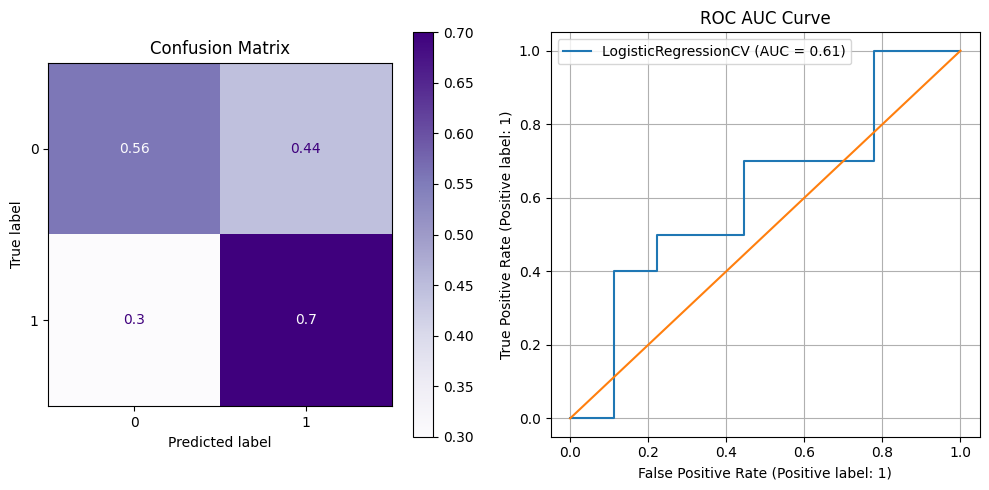

In [16]:
# Fit and evaluate df_select on a Logistic Regression model.
log_select = fit_eval(LogisticRegressionCV(random_state=42), \
                      X_train_select, y_train_select, \
                      X_test_select, y_test_select)

In [17]:
from statsmodels.formula.api import logit


log_res = logit("AttackType ~  WinRate", df_select).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.692626
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:             AttackType   No. Observations:                  124
Model:                          Logit   Df Residuals:                      122
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:               5.937e-07
Time:                        06:52:45   Log-Likelihood:                -85.886
converged:                       True   LL-Null:                       -85.886
Covariance Type:            nonrobust   LLR p-value:                    0.9919
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0503      1.422      0.035      0.972      -2.737       2.837
WinRate        0.0003      0.

In [18]:
log_res = logit("AttackType ~  diverity", df_select).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.633370
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             AttackType   No. Observations:                  124
Model:                          Logit   Df Residuals:                      122
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                 0.08555
Time:                        06:52:45   Log-Likelihood:                -78.538
converged:                       True   LL-Null:                       -85.886
Covariance Type:            nonrobust   LLR p-value:                 0.0001263
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7556      0.777      3.549      0.000       1.234       4.278
diverity      -0.6919      0.

In [19]:
log_res = logit("AttackType ~  Totalwins", df_select).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.692460
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:             AttackType   No. Observations:                  124
Model:                          Logit   Df Residuals:                      122
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:               0.0002404
Time:                        06:52:45   Log-Likelihood:                -85.865
converged:                       True   LL-Null:                       -85.886
Covariance Type:            nonrobust   LLR p-value:                    0.8390
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0185      0.289      0.064      0.949      -0.548       0.585
Totalwins      0.0005      0.

In [20]:
log_res = logit("AttackType ~  Totalwins+ WinRate+Picked+Banned+diverity", df_select).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.628134
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             AttackType   No. Observations:                  124
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                 0.09311
Time:                        06:52:45   Log-Likelihood:                -77.889
converged:                       True   LL-Null:                       -85.886
Covariance Type:            nonrobust   LLR p-value:                  0.006861
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0346      2.108      0.965      0.335      -2.098       6.167
Totalwins     -0.0056      0.

In [21]:
df_d=df.drop(['Name', 'Roles'], axis =1)
df_d = pd.get_dummies(df_d, prefix='', prefix_sep='').groupby(level=0, axis=1).max()
df_d

,AttackRange,AttackType,Banned,Niche,Picked,Totalwins,WinRate,agi,all,diverity,int,str
0,150.0,0.0,61.0,0.0,24.0,8.0,33.33,0.0,1.0,3.0,0.0,0.0
1,150.0,0.0,22.0,0.0,55.0,23.0,41.82,0.0,0.0,6.0,0.0,1.0
2,675.0,1.0,73.0,0.0,77.0,40.0,51.95,0.0,0.0,3.0,1.0,0.0
3,150.0,0.0,78.0,0.0,66.0,40.0,60.61,1.0,0.0,3.0,0.0,0.0
4,625.0,1.0,31.0,0.0,14.0,5.0,35.71,1.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,600.0,1.0,432.0,0.0,165.0,76.0,46.06,0.0,1.0,5.0,0.0,0.0
120,425.0,1.0,225.0,0.0,53.0,21.0,39.62,0.0,1.0,3.0,0.0,0.0
121,550.0,1.0,71.0,0.0,145.0,62.0,42.76,0.0,0.0,3.0,1.0,0.0
122,150.0,0.0,40.0,1.0,99.0,52.0,52.53,0.0,0.0,5.0,0.0,1.0


In [52]:
df_d.columns

Index(['AttackRange', 'AttackType', 'Banned', 'Niche', 'Picked', 'Totalwins',
       'WinRate', 'agi', 'all', 'diverity', 'int', 'str'],
      dtype='object')

In [54]:
log_res = logit("str ~  AttackRange+AttackType+Banned+Niche+Picked+Totalwins+WinRate", df_d).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.305629
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    str   No. Observations:                  124
Model:                          Logit   Df Residuals:                      116
Method:                           MLE   Df Model:                            7
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                  0.4565
Time:                        07:16:05   Log-Likelihood:                -37.898
converged:                       True   LL-Null:                       -69.730
Covariance Type:            nonrobust   LLR p-value:                 2.790e-11
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7348      3.230      0.847      0.397      -3.596       9.066
AttackRange    -0.0075    

In [55]:
log_res = logit("int ~  AttackRange+AttackType+Banned+Niche+Picked+Totalwins+WinRate", df_d).fit()
print(log_res.summary())

         Current function value: 0.301288
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    int   No. Observations:                  124
Model:                          Logit   Df Residuals:                      116
Method:                           MLE   Df Model:                            7
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                  0.4555
Time:                        07:16:54   Log-Likelihood:                -37.360
converged:                      False   LL-Null:                       -68.609
Covariance Type:            nonrobust   LLR p-value:                 4.775e-11
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -17.0944    614.822     -0.028      0.978   -1222.124    1187.935
AttackRange     0.0071      0.003      2.175      0.030       

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
log_res = logit("agi ~  AttackRange+AttackType+Banned+Niche+Picked+Totalwins+WinRate", df_d).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.512147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    agi   No. Observations:                  124
Model:                          Logit   Df Residuals:                      116
Method:                           MLE   Df Model:                            7
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                 0.08925
Time:                        07:18:54   Log-Likelihood:                -63.506
converged:                       True   LL-Null:                       -69.730
Covariance Type:            nonrobust   LLR p-value:                   0.08680
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.3061      2.496     -1.324      0.185      -8.199       1.587
AttackRange    -0.0060    

In [57]:
log_res = logit("all ~  AttackRange+AttackType+Banned+Niche+Picked+Totalwins+WinRate", df_d).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.521759
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    all   No. Observations:                  124
Model:                          Logit   Df Residuals:                      116
Method:                           MLE   Df Model:                            7
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                 0.08627
Time:                        07:20:21   Log-Likelihood:                -64.698
converged:                       True   LL-Null:                       -70.807
Covariance Type:            nonrobust   LLR p-value:                   0.09364
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5410      2.239      0.242      0.809      -3.848       4.930
AttackRange    -0.0005    

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.5962    0.6078    0.6019        51
           1     0.6226    0.6111    0.6168        54

    accuracy                         0.6095       105
   macro avg     0.6094    0.6095    0.6094       105
weighted avg     0.6098    0.6095    0.6096       105

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.6250    0.5556    0.5882         9
           1     0.6364    0.7000    0.6667        10

    accuracy                         0.6316        19
   macro avg     0.6307    0.6278    0.6275        19
weighted avg     0.6310    0.6316    0.6295        19

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


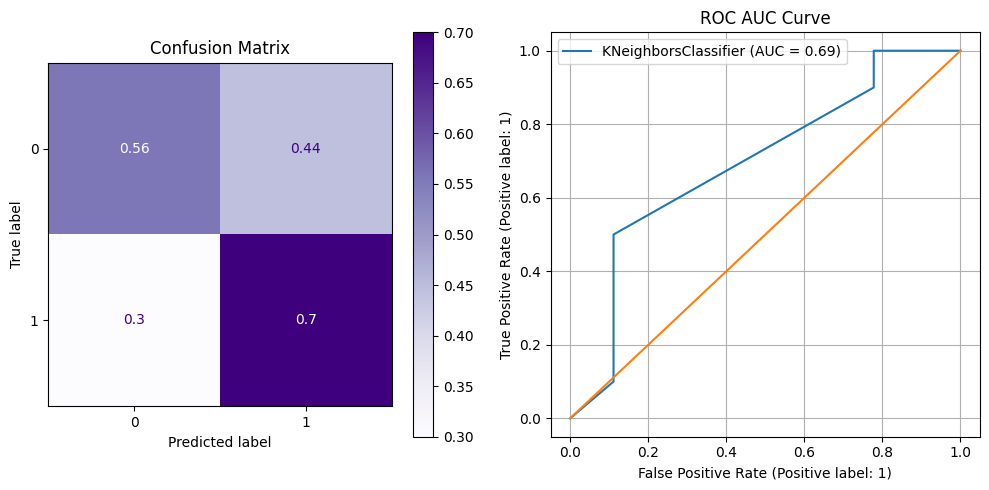

KNeighborsClassifier(n_neighbors=25)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
fit_eval(KNeighborsClassifier(n_neighbors=25), \
                      X_train_select, y_train_select, \
                      X_test_select, y_test_select)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from xgboost import XGBRFClassifier, XGBClassifier

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        51
           1     1.0000    1.0000    1.0000        54

    accuracy                         1.0000       105
   macro avg     1.0000    1.0000    1.0000       105
weighted avg     1.0000    1.0000    1.0000       105

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.5556    0.5556    0.5556         9
           1     0.6000    0.6000    0.6000        10

    accuracy                         0.5789        19
   macro avg     0.5778    0.5778    0.5778        19
weighted avg     0.5789    0.5789    0.5789        19

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


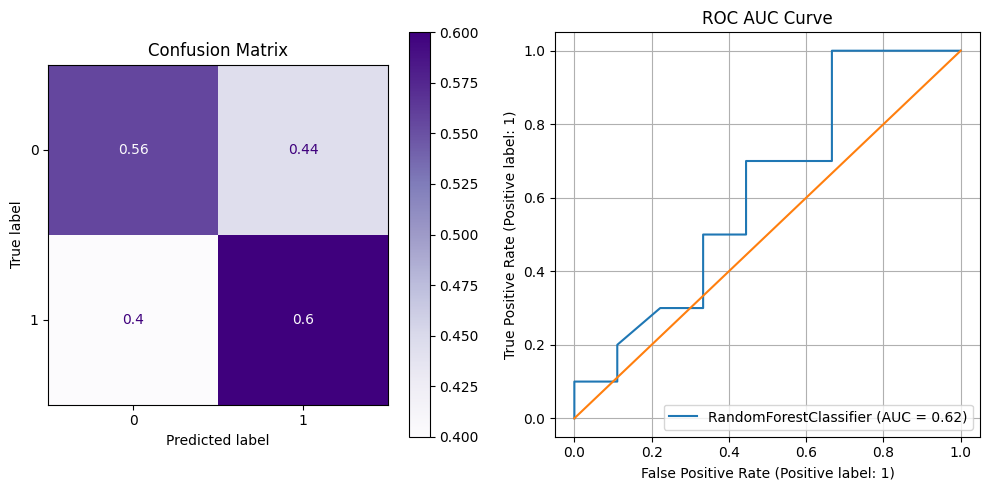

RandomForestClassifier(random_state=42)

In [24]:
fit_eval(RandomForestClassifier(random_state=42), X_train_select, \
         y_train_select, X_test_select, y_test_select)

# мульти класс

In [25]:
df.columns

Index(['Name', 'Attribute', 'AttackType', 'AttackRange', 'Roles', 'Totalwins',
       'Picked', 'Banned', 'WinRate', 'Niche', 'diverity'],
      dtype='object')

In [26]:
df_mul =df[['Attribute', 'AttackType', 'AttackRange', 'Totalwins',
       'Picked', 'Banned', 'WinRate', 'Niche', 'diverity']]
df_mul

,Attribute,AttackType,AttackRange,Totalwins,Picked,Banned,WinRate,Niche,diverity
0,all,0,150,8,24,61,33.33,0,3
1,str,0,150,23,55,22,41.82,0,6
2,int,1,675,40,77,73,51.95,0,3
3,agi,0,150,40,66,78,60.61,0,3
4,agi,1,625,5,14,31,35.71,0,3
...,...,...,...,...,...,...,...,...,...
119,all,1,600,76,165,432,46.06,0,5
120,all,1,425,21,53,225,39.62,0,3
121,int,1,550,62,145,71,42.76,0,3
122,str,0,150,52,99,40,52.53,1,5


In [44]:
# Create training and test data splits.
X_train, X_test, y_train, \
                y_test = split_scale(df_mul, 'Attribute')


https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/?ref=lbp

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# accuracy on X_test
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

0.42105263157894735


In [47]:
cm

array([[1, 0, 1, 4],
       [0, 1, 0, 3],
       [0, 3, 3, 0],
       [0, 0, 0, 3]])

In [48]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

# model accuracy for X_test
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

0.631578947368421


In [49]:
cm

array([[2, 1, 1, 2],
       [0, 2, 0, 2],
       [0, 0, 6, 0],
       [1, 0, 0, 2]])

In [50]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print (accuracy)

# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)

0.42105263157894735


In [51]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

# accuracy on X_test
accuracy = gnb.score(X_test_select, y_test_select)
print(accuracy)

# creating a confusion matrix
cm = confusion_matrix(y_test_select, gnb_predictions)

0.47368421052631576


In [37]:
cm

array([[0, 0, 3, 3],
       [0, 0, 1, 3],
       [0, 0, 6, 0],
       [0, 0, 0, 3]])

# лин регресс

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [39]:
lin_res = ols("AttackRange ~ Totalwins+ WinRate+Picked+Banned+diverity", df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:            AttackRange   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2.883
Date:                Wed, 08 Nov 2023   Prob (F-statistic):             0.0171
Time:                        07:04:11   Log-Likelihood:                -825.46
No. Observations:                 124   AIC:                             1663.
Df Residuals:                     118   BIC:                             1680.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    449.7419    187.179      2.403      0.0

In [40]:
lin_res = ols("WinRate ~ Totalwins+AttackRange+Picked+Banned+diverity", df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                WinRate   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     17.94
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           3.33e-13
Time:                        07:04:11   Log-Likelihood:                -368.96
No. Observations:                 124   AIC:                             749.9
Df Residuals:                     118   BIC:                             766.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.8101      2.178     21.496      

In [41]:
lin_res = ols("WinRate ~ AttackRange+Picked+Banned+diverity", df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                WinRate   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.7762
Date:                Wed, 08 Nov 2023   Prob (F-statistic):              0.543
Time:                        07:04:11   Log-Likelihood:                -402.42
No. Observations:                 124   AIC:                             814.8
Df Residuals:                     119   BIC:                             828.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      45.4631      2.834     16.043      

In [42]:
lin_res = ols("WinRate ~ Totalwins", df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                WinRate   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     5.039
Date:                Wed, 08 Nov 2023   Prob (F-statistic):             0.0266
Time:                        07:04:11   Log-Likelihood:                -401.51
No. Observations:                 124   AIC:                             807.0
Df Residuals:                     122   BIC:                             812.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.8125      0.898     53.260      0.0

In [58]:
lin_res = ols("str ~  AttackRange+AttackType+Banned+Niche+Picked+Totalwins+WinRate", df_d).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    str   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     10.39
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           4.50e-10
Time:                        07:22:35   Log-Likelihood:                -41.986
No. Observations:                 124   AIC:                             99.97
Df Residuals:                     116   BIC:                             122.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7925      0.334      2.376      

In [59]:
lin_res = ols("int ~  AttackRange+AttackType+Banned+Niche+Picked+Totalwins+WinRate", df_d).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    int   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     11.24
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           8.33e-11
Time:                        07:23:06   Log-Likelihood:                -38.691
No. Observations:                 124   AIC:                             93.38
Df Residuals:                     116   BIC:                             115.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2178      0.325     -0.670      

In [60]:
lin_res = ols("agi ~  AttackRange+AttackType+Banned+Niche+Picked+Totalwins+WinRate", df_d).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    agi   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.679
Date:                Wed, 08 Nov 2023   Prob (F-statistic):              0.121
Time:                        07:24:08   Log-Likelihood:                -66.177
No. Observations:                 124   AIC:                             148.4
Df Residuals:                     116   BIC:                             170.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1637      0.405     -0.404      

In [61]:
lin_res = ols("all ~  AttackRange+AttackType+Banned+Niche+Picked+Totalwins+WinRate", df_d).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    all   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.736
Date:                Wed, 08 Nov 2023   Prob (F-statistic):              0.107
Time:                        07:24:30   Log-Likelihood:                -67.284
No. Observations:                 124   AIC:                             150.6
Df Residuals:                     116   BIC:                             173.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5890      0.409      1.440      